# Anomalia de campo total produzida por uma esfera

Este código utiliza a biblioteca de modelagem e inversão de dados geofísicos denominada [Fatiando a Terra](http://www.fatiando.org/index.html).

### Coisas para importar

In [1]:
%matplotlib inline
import numpy as np
from fatiando import mesher, gridder, utils
from fatiando.gravmag import sphere
from fatiando.vis import mpl

### Pontos onde são calculados os dados

In [2]:
shape = (100, 100) # número de pontos ao longo de x e y
area = (-5000, 5000, -5000, 5000) # x mínimo, x máximo, y mínimo e y máximo da área
xp, yp, zp = gridder.regular(area, shape, z=-100) # grade regular localizada em z = -100 m

xc = area[1] - area[0]
yc = area[3] - area[2]

### Inclinação e a declinação do campo geomagnético local

In [3]:
inc = -30. # graus
dec = 0. # graus

In [13]:
amp = 23500.0 + 0.05*(xp - xc) + 0.08*(yp - yc) # nT

In [14]:
F = utils.ang2vec(1.0, inc, dec) # versor do campo geomagnético local

In [15]:
print F

[ 0.8660254  0.        -0.5      ]


### Modelo de corpo esférico

In [16]:
model = [mesher.Sphere(0., 0., 700., 500., {'magnetization': utils.ang2vec(10., inc, dec)})]

### Anomalia de campo total (em nT)

In [17]:
bx = sphere.bx(xp, yp, zp, model)
by = sphere.by(xp, yp, zp, model)
bz = sphere.bz(xp, yp, zp, model)

In [18]:
act_aprox = sphere.tf(xp, yp, zp, model, inc, dec)

In [19]:
ct = np.sqrt((amp*F[0] + bx)**2 + (amp*F[1] + by)**2 + (amp*F[2] + bz)**2)

In [20]:
act = ct - amp

### Plot da anomalia de campo total

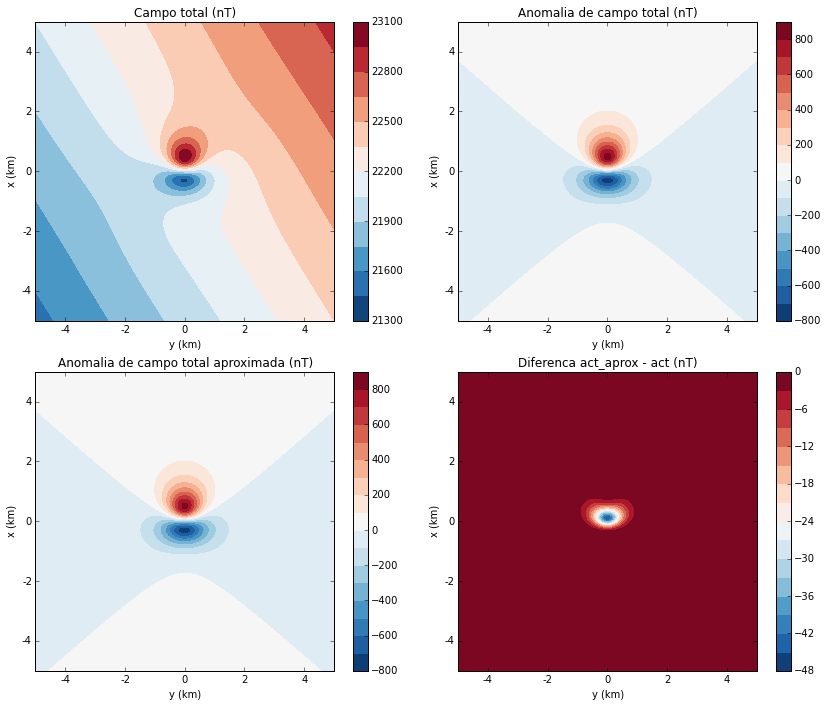

In [21]:
mpl.close('all')
mpl.figure(figsize=(12,10))

mpl.subplot(2,2,1)
mpl.title("Campo total (nT)")
mpl.axis('scaled')
mpl.contourf(yp, xp, ct, shape, 15, cmap = mpl.get_cmap('RdBu_r'))
mpl.colorbar()
mpl.xlabel('y (km)')
mpl.ylabel('x (km)')
mpl.m2km()

mpl.subplot(2,2,2)
mpl.title("Anomalia de campo total (nT)")
mpl.axis('scaled')
mpl.contourf(yp, xp, act, shape, 15, cmap = mpl.get_cmap('RdBu_r'))
mpl.colorbar()
mpl.xlabel('y (km)')
mpl.ylabel('x (km)')
mpl.m2km()

mpl.subplot(2,2,3)
mpl.title("Anomalia de campo total aproximada (nT)")
mpl.axis('scaled')
mpl.contourf(yp, xp, act_aprox, shape, 15, cmap = mpl.get_cmap('RdBu_r'))
mpl.colorbar()
mpl.xlabel('y (km)')
mpl.ylabel('x (km)')
mpl.m2km()

mpl.subplot(2,2,4)
mpl.title("Diferenca act_aprox - act (nT)")
mpl.axis('scaled')
mpl.contourf(yp, xp, act_aprox - act, shape, 15, cmap = mpl.get_cmap('RdBu_r'))
mpl.colorbar()
mpl.xlabel('y (km)')
mpl.ylabel('x (km)')
mpl.m2km()

mpl.tight_layout(pad = 2.)

mpl.show()